# ***Theft and Theft-Related Crimes since 2005 in Pittsburgh Neighborhoods***

This measures the number of thefts in Pittsburgh neighborhoods since 2005. This will be expressed as a bar graph for visualization purposes. The lower the number of theft-related crime incidents, the better the neighborhood is considered in my measure.

In [1]:
#Retrieval of Data
import pandas as pd
crime_report = pd.read_csv("police-report-incidents.tsv", sep="\t")

neighborhoods = []
theft_count = []

offense_query_mask = crime_report['OFFENSES'].str.contains('Theft')

for n in crime_report['INCIDENTNEIGHBORHOOD'].unique():
    neighborhoods.append(n)
    name_query_mask = crime_report['INCIDENTNEIGHBORHOOD'] == n
    theft_count.append(len(crime_report[name_query_mask & offense_query_mask]))

#x and y have minimum [20] neighborhoods
X = []
Y = []

index = 0

while index < 21:
    min_value = min(theft_count)
    min_neighborhood = neighborhoods[theft_count.index(min_value)]

    if index != 0: #the first element attempted to add is 'nan' which implies an unspecified neighborhood, which is not relevant to our overall measure
        Y.append(min_value)
        X.append(min_neighborhood)

    theft_count.remove(min_value)
    neighborhoods.remove(min_neighborhood)
    
    index+=1

<function matplotlib.pyplot.show(close=None, block=None)>

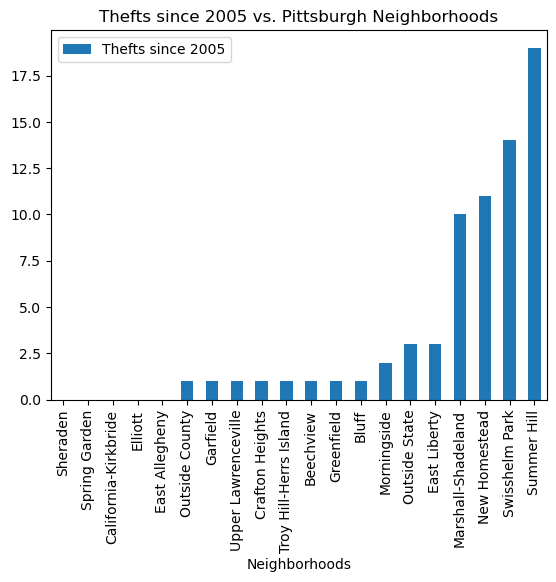

In [2]:
#Graph Production
import matplotlib.pyplot as plt

data = pd.DataFrame({'Neighborhoods': X, 'Thefts since 2005': Y})

data.plot.bar(x='Neighborhoods', y='Thefts since 2005')
plt.title('Thefts since 2005 vs. Pittsburgh Neighborhoods')

plt.show

In [49]:
print("Shadyside: ", theft_count[neighborhoods.index("Shadyside")])
print("North Oakland: ", theft_count[neighborhoods.index("North Oakland")])

Shadyside:  475
North Oakland:  548


### **Conclusion**

Based on this measure, Sheraden, Spring Garden, California-Kirkbride, Elliott, and East Allegheny are ideal, all having 0 incidences of theft-based police reports since 2005.

My personal favorite neighborhood is either Shadyside because I feel safe when I am there and there are lots of places to shop or North Oakland because the houses and environment is very pretty to walk through. However, as printed before, these each have higher incidences of theft-based crime. This is likely due to the higher population and higher average income of residents in each of these neighborhoods. As a result, they are more likely to be targets of theft, especially burglary.